# pretrained_CNN

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


Using TensorFlow backend.


# 1.1. loat_model

In [23]:
#Load the VGG model
# vgg_model = vgg16.VGG16(weights='imagenet')
vgg_model = vgg16.VGG16(weights='imagenet', include_top = False)


#Load the Inception_V3 model
# inception_model = inception_v3.InceptionV3(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top = False)


#Load the ResNet50 model
# resnet_model = resnet50.ResNet50(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet', include_top = False)
 
#Load the MobileNet model
# mobilenet_model = mobilenet.MobileNet(weights='imagenet') 
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = False)  

87916544/87910968 [==============================] - 21s 0us/step


C:\anaconda\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 19s 0us/step


C:\anaconda\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 7s 0us/step


In [3]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

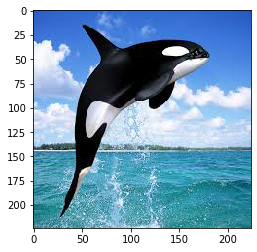

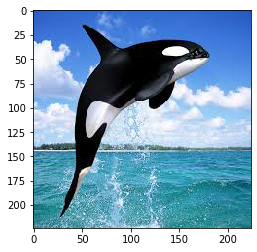

image batch size (1, 224, 224, 3)


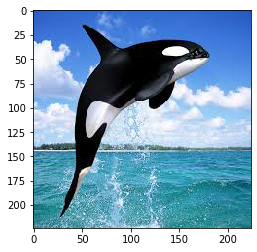

In [4]:
filename = 'whale.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## 1.2. image proprecessing

In [5]:
processed_image = vgg16.preprocess_input(image_batch.copy())

## 1.3 예측

In [6]:
predictions = vgg_model.predict(processed_image)
print(predictions.shape)


(1, 1000)


In [7]:
# 확률값 top 10의 이름 확인
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)

[[('n02071294', 'killer_whale', 0.9999542), ('n02066245', 'grey_whale', 3.519719e-05), ('n01484850', 'great_white_shark', 2.021406e-06), ('n02058221', 'albatross', 1.6710646e-06), ('n03710721', 'maillot', 1.3266089e-06), ('n02056570', 'king_penguin', 1.3111684e-06), ('n02077923', 'sea_lion', 7.901707e-07), ('n10565667', 'scuba_diver', 6.49172e-07), ('n03873416', 'paddle', 4.8631216e-07), ('n03710637', 'maillot', 4.7966563e-07)]]


# 2. model
## 2.1. VGG16

In [8]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
print(predictions.shape)
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)

(1, 1000)
[[('n02071294', 'killer_whale', 0.9999542), ('n02066245', 'grey_whale', 3.519719e-05), ('n01484850', 'great_white_shark', 2.021406e-06), ('n02058221', 'albatross', 1.6710646e-06), ('n03710721', 'maillot', 1.3266089e-06), ('n02056570', 'king_penguin', 1.3111684e-06), ('n02077923', 'sea_lion', 7.901707e-07), ('n10565667', 'scuba_diver', 6.49172e-07), ('n03873416', 'paddle', 4.8631216e-07), ('n03710637', 'maillot', 4.7966563e-07)]]


## 2.2. moael-resnet50

In [9]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02071294', 'killer_whale', 0.9996822),
  ('n01582220', 'magpie', 0.00015110924),
  ('n02056570', 'king_penguin', 7.984417e-05)]]

## 2.3. mobilnet

In [10]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02071294', 'killer_whale', 0.99963284),
  ('n02056570', 'king_penguin', 0.00012926947),
  ('n02066245', 'grey_whale', 4.528607e-05),
  ('n02096585', 'Boston_bull', 3.543426e-05),
  ('n02077923', 'sea_lion', 2.2903729e-05)]]

## 2.4. inception_v3

In [15]:
filename = 'whale.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02071294', 'killer_whale', 0.9835892),
  ('n02066245', 'grey_whale', 0.00065952),
  ('n02783161', 'ballpoint', 0.00021869983),
  ('n02056570', 'king_penguin', 0.00019789884),
  ('n01582220', 'magpie', 0.0001753606)]]

In [18]:
import cv2
img = cv2.imread("whale.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

True

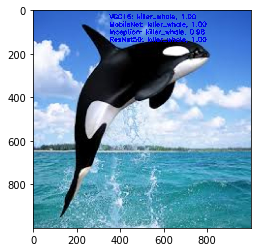

In [21]:
img = cv2.imread("out.jpg", 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. 이미지 10개  label 확인하기

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

## 3.1 data Augmentation

In [130]:
batch_size = 10

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './tmp',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

X, T = test_generator.next()
X.shape , T.shape

Found 10 images belonging to 10 classes.


((10, 224, 224, 3), (10,))

## 3. 2. model

In [131]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
# vgg_model = vgg16.VGG16(weights='imagenet', include_top = False)

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
# inception_model = inception_v3.InceptionV3(weights='imagenet', include_top = False)


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
# resnet_model = resnet50.ResNet50(weights='imagenet', include_top = False)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet') # mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = False)  

In [132]:
decode_vgg = decode_predictions(
    vgg_model.predict(
        vgg16.preprocess_input(X.copy())), top = 3)

decode_resnet = decode_predictions(
    resnet_model.predict(
        resnet50.preprocess_input(X.copy())), top = 3)

decode_mobilenet = decode_predictions(
    mobilenet_model.predict(
        mobilenet.preprocess_input(X.copy())), top = 3)

In [133]:
for i in range(X.shape[0]):
    img = cv2.resize(X[i], (1000,1000))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imwrite(f"./tmp/out{i}.jpg", img*255)

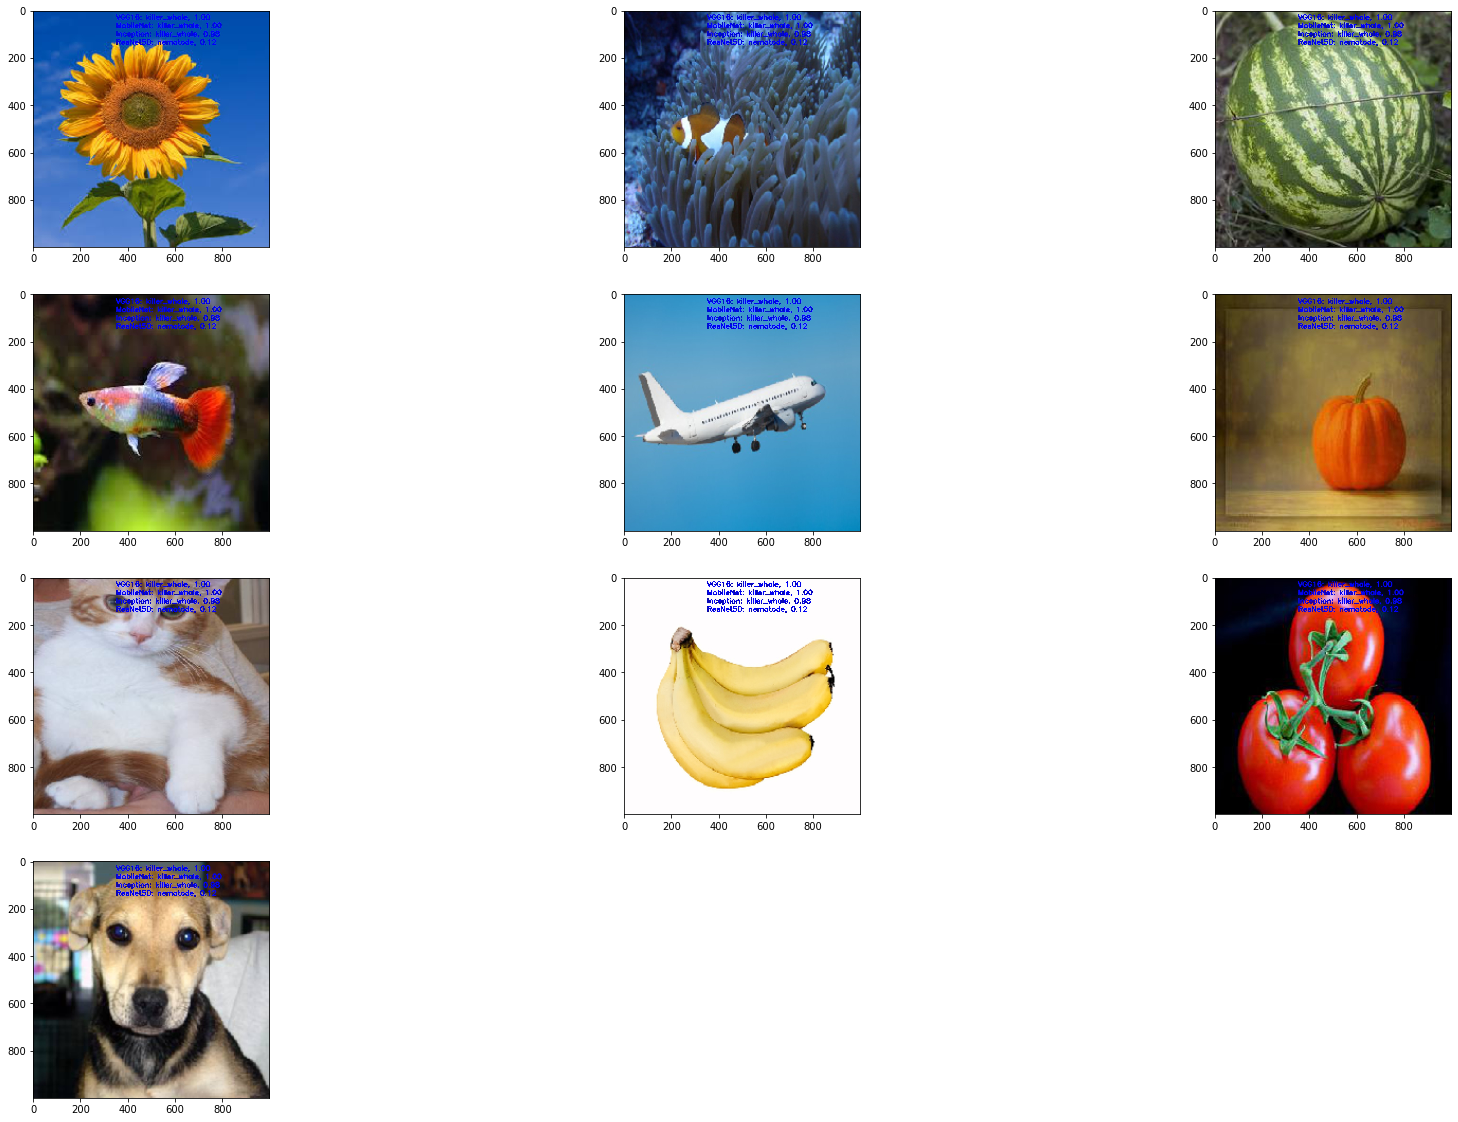

In [141]:
plt.figure(figsize = (30,20))
for i in range(X.shape[0]):
    plt.subplot(4, 3, i + 1)
    img = cv2.imread(f"./tmp/out{i}.jpg", 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)